# Wiener-folyamat 

In [1]:
import numpy as np

def veletlen_bolyongas(
    kezdo_pont: float, 
    ido: float,  
    utvonal_szam: int = 10000
) -> list:
    """
    A véletlen bolyongás szimulálása során egy diszkrét időben zajló folyamatot modellezünk, 
    ahol minden lépésnél az érték egy egységgel növekszik vagy csökken, 
    egyenlő valószínűséggel (50%-os eséllyel). 
    Ez a klasszikus véletlen bolyongás (random walk) modell.

    Args:
      kezdo_pont: honnan kezdjük a bolyongást
      ido: milyen hosszú a bolyongás
      utvonal_szam: mennyi bolyongást szimulálunk
      
    Returns:
      szimulált bolyongások 
    """

    bolyongasok = []
    # egy útvonal
    for _ in range(utvonal_szam):
        ez_az_ut = [kezdo_pont]
        for t in range(ido):
            # véletlenszerű lépés iránya
            dB = 1-2*np.random.binomial(1, 0.5)
            # lépünk
            dS_S = ez_az_ut[-1]+dB
            ez_az_ut.append(dS_S)
        bolyongasok.append(ez_az_ut)

    return bolyongasok

bolyongasok = veletlen_bolyongas(kezdo_pont=0, ido=100, utvonal_szam=10000)

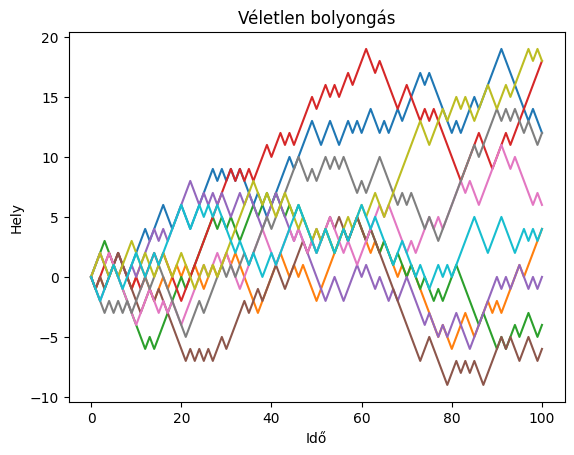

In [2]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.plot( bolyongasok[i] )
    
plt.xlabel("Idő")
plt.ylabel("Hely")
plt.title("Véletlen bolyongás")
plt.show()

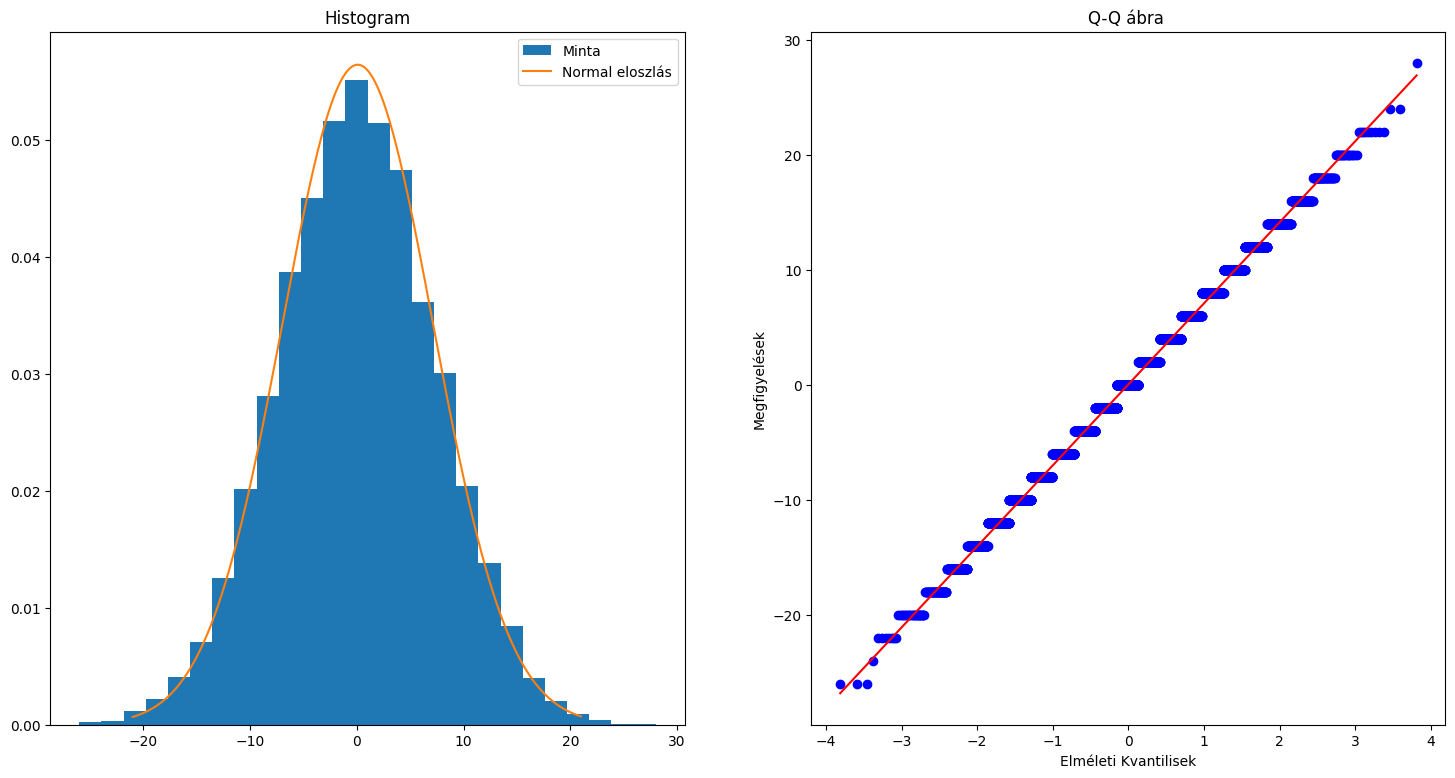

In [3]:
from scipy import stats
# megfigyelések
obs = [ x[50] for x in bolyongasok ] 
obs_mean = np.mean(obs)
obs_std = np.std(obs)

fig, axes = plt.subplots(ncols=2, figsize=(18, 9))
# minta
axes[0].hist(obs, bins=26, density=True, label="Minta")
# standard normál pdf sűrűségfüggvénye 
bins = [ (x-obs_mean)/100 for x in range(int(obs_mean-3*obs_std)*100, int(obs_mean+3*obs_std)*100) ]
normalpdf = stats.norm.pdf(bins, obs_mean, obs_std)
axes[0].plot(bins, normalpdf, label="Normal eloszlás")
axes[0].set_title("Histogram")
axes[0].legend()

# Q-Q ábra
plt.subplot(1,2,2)
stats.probplot(obs, dist="norm", plot=plt)
axes[1].set_title("Q-Q ábra ")
axes[1].set_xlabel("Elméleti Kvantilisek")
axes[1].set_ylabel("Megfigyelések")

plt.show()

# Általánosított Wiener-folyamat

In [4]:
import numpy as np

def altalanositott_Wiener_folyamat(
    kezdo_pont: float, 
    ido: float,
    atlag: float,
    szoras: float, 
    utvonal_szam: int = 10000
) -> list:
    """
    Az Általánosított Wiener-folyamat egy olyan sztochasztikus folyamat, 
    amely a Wiener-folyamatot egy determinisztikus trenddel és egy skálázott véletlen taggal egészíti ki. 

    Args:
      kezdo_pont: honnan kezdjük a bolyongást
      ido: milyen hosszú a bolyongás
      atlag: a folyamat determinisztikus komponensét adja meg (azaz az átlagos irányt, amerre a folyamat halad),
      szorasnegyzet: szórás (volatilitás) tag, amely a véletlen komponens mértékét határozza meg,
      utvonal_szam: mennyi bolyongást szimulálunk
      
    Returns:
      szimulált bolyongások 
    """

    bolyongasok = []
    # egy útvonal
    for _ in range(utvonal_szam):
        ez_az_ut = [kezdo_pont]
        for t in range(ido):
            # véletlenszerű lépés iránya
            dW = np.random.normal(0,1)
            # lépünk
            dS_S = (ez_az_ut[-1]+atlag)+(szoras*dW)
            ez_az_ut.append(dS_S)
        bolyongasok.append(ez_az_ut)

    return bolyongasok

bolyongasok = altalanositott_Wiener_folyamat(
    kezdo_pont=0, 
    ido=100,
    atlag=1.5,
    szoras=2,
    utvonal_szam=10000
)

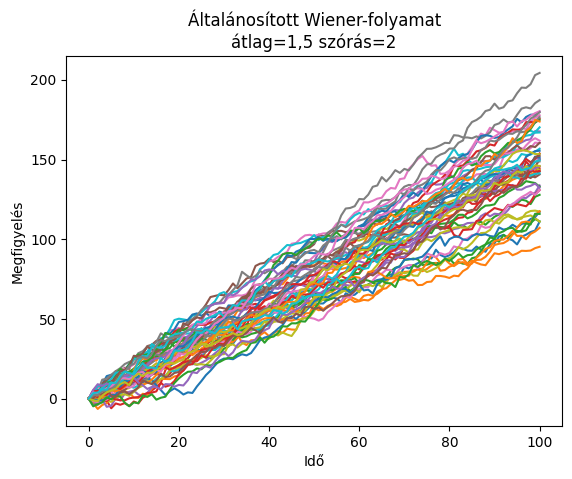

In [5]:
import matplotlib.pyplot as plt

for i in range(50):
    plt.plot( bolyongasok[i] )
    
plt.xlabel("Idő")
plt.ylabel("Megfigyelés")
plt.title("Általánosított Wiener-folyamat\nátlag=1,5 szórás=2")
plt.show()

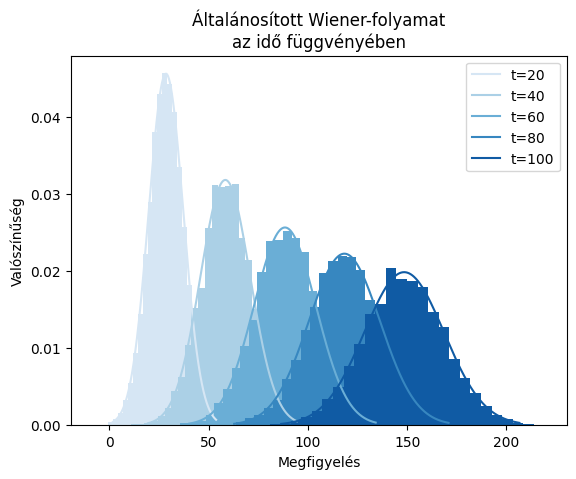

In [6]:
import seaborn as sns 

indexs = [19,39,59,79,99]
colors = [ x for x in sns.color_palette("Blues",len(indexs))]

for i in range(len(indexs)):
    time_index = indexs[i]
    color = colors[i]
    # megfigyelések
    obs = [ x[time_index] for x in bolyongasok ] 
    obs_mean = np.mean(obs)
    obs_std = np.std(obs)

    # minta
    plt.hist(obs, bins=28, density=True, color=color)
    # standard normál pdf sűrűségfüggvénye 
    bins = [ (x-obs_mean)/100 for x in range(int(obs_mean-3*obs_std)*100, int(obs_mean+3*obs_std)*100) ]
    normalpdf = stats.norm.pdf(bins, obs_mean, obs_std)
    plt.plot(bins, normalpdf, label=f"t={time_index+1}", color=color)

plt.title("Általánosított Wiener-folyamat\naz idő függvényében")
plt.xlabel("Megfigyelés")
plt.ylabel("Valószínűség")
plt.legend()
plt.show()